In [1]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt

%matplotlib inline

## Loading data

In [2]:
# Get csv files 
data_folder = r'G:\Masters\Term 2\Machine Learning\Project\MainData'
files = os.listdir(data_folder)

# Read in dataframes
df_s = pd.read_csv(os.path.join(data_folder,files[0]))
df_t = pd.read_csv(os.path.join(data_folder,files[1]))

print('Source data frame')
print(df_s.head())
print('Target data frame')
print(df_t.head())

df_list = [df_s, df_t]

Source data frame
    date                                               data  target
0  07_19  [0.024633719140023658, 0.026067174888460443, 0...       0
1  07_21  [0.02658130505412437, 0.027556447394012196, 0....       0
2  07_22  [-0.03536414070674887, -0.03872810277071714, -...       0
3  08_22  [0.0026019472705502977, 0.0018156639264717, 0....       0
4  09_30  [0.03471199216254231, 0.038584062475376164, 0....       1
Target data frame
    date                                               data  target
0  07_19  [-0.13056183345288908, -0.1318453994947042, -0...       0
1  07_21  [-0.10559255891657138, -0.10637897135473295, -...       0
2  07_22  [-0.12561508138170413, -0.11963401361373238, -...       1
3  08_22  [0.11925366121670383, 0.12795125250858552, 0.1...       1


In [3]:
print(f'Name of columns are:\n{df_t.columns}')

Name of columns are:
Index(['date', 'data', 'target'], dtype='object')


In [4]:
x_s = []
y_s = []
x_t = []
y_t = []
for j in range(df_s.shape[0]):

    sig = np.array(eval(df_s.data[j]))
    for i in range(50):
        s = sig[500*i:500*(i+1)]
        x_s.append(s)
        y_s.append(df_s.target.values[j])

for j in range(df_t.shape[0]):

    sig = np.array(eval(df_t.data[j]))
    for i in range(50):
        s = sig[500*i:500*(i+1)]
        x_t.append(s)
        y_t.append(df_t.target.values[j])



In [10]:
print(f'There are {len(x_s)} sub-signals for source data')
print(f'There are {len(x_t)} sub-signals for target data')

There are 400 sub-signals for source data
There are 200 sub-signals for target data


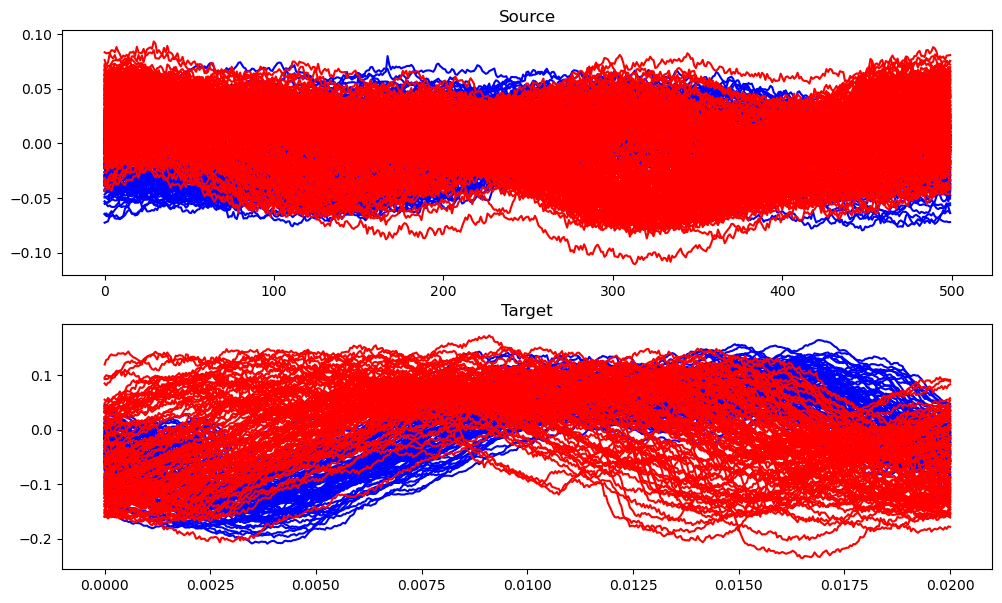

In [83]:
plt.figure(figsize=(12,7))
cl = ['blue','red']
for i in range(400):
    plt.subplot(2,1,1)
    plt.plot(x_s[i], c=cl[y_s[i]])
    plt.title('Source')
    
for i in range(200):
    plt.subplot(2,1,2)
    plt.plot(np.linspace(0,1/50,500),x_t[i], c=cl[y_t[i]])
    plt.title('Target')


## Signal pre-processing

Noise reduction

### with some algorithms

In [5]:
from scipy.signal import savgol_filter # Have a research about this algorithm

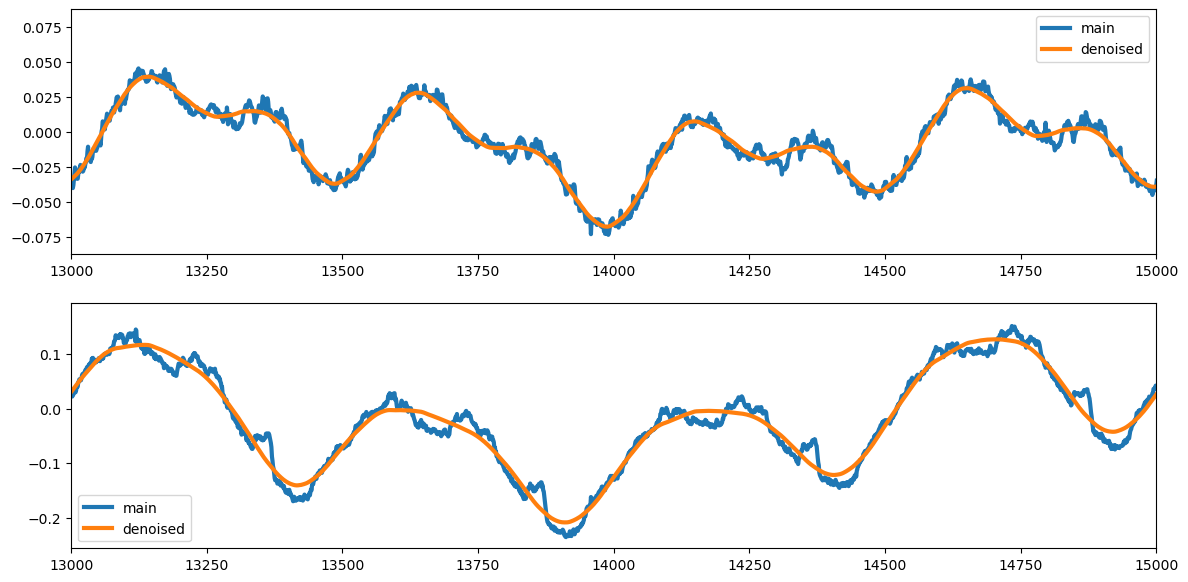

In [6]:
sig = np.array(eval(df_s.data[3]))
plt.figure(figsize=(14,7))
plt.subplot(2,1,1)
plt.plot(sig,linewidth=3)
plt.plot(savgol_filter(sig, 200,3),linewidth=3)
plt.xlim([13000,15000])
plt.legend(['main', 'denoised'])

sig = np.array(eval(df_t.data[3]))
plt.subplot(2,1,2)
plt.plot(sig,linewidth=3)
plt.plot(savgol_filter(sig, 450,4),linewidth=3)
plt.xlim([13000,15000])
plt.legend(['main', 'denoised'])

# savgol_filter(signal, 450, 3) is good for TARGET data
# savgol_filter(signal, 200, 3) is good for SOURCE data

In [7]:
x_s_smooth =[]
x_t_smooth = []
for i in range(len(x_s)):
    signal = x_s[i]
    smooth = savgol_filter(signal, 200, 3)
    x_s_smooth.append(smooth)
for i in range(len(x_t)):
    signal = x_t[i]
    smooth = savgol_filter(signal, 200, 3)
    x_t_smooth.append(smooth)

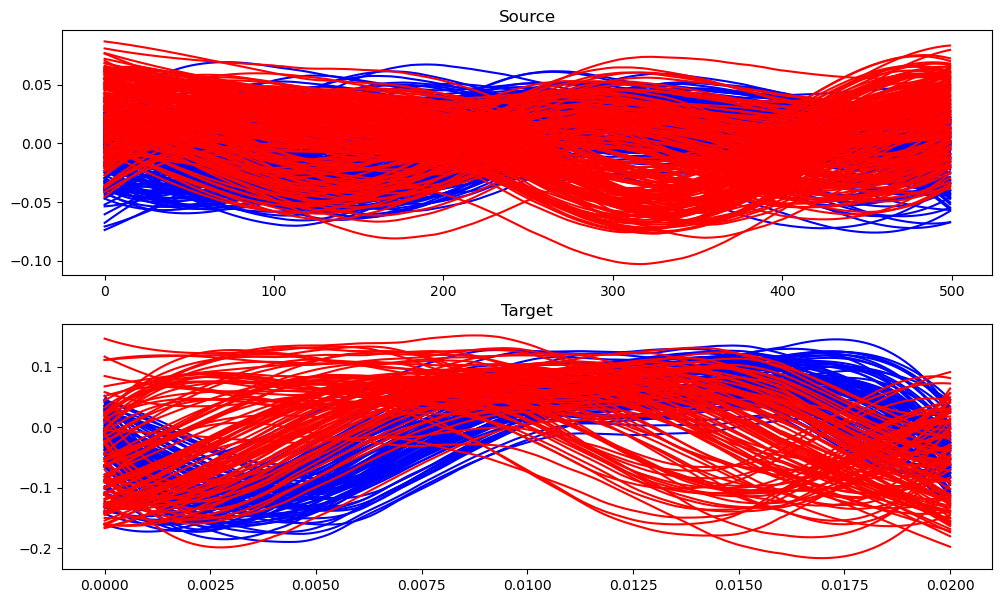

In [81]:
plt.figure(figsize=(12,7))
cl = ['blue','red']
for i in range(400):
    plt.subplot(2,1,1)
    plt.plot(x_s_smooth[i], c=cl[y_s[i]])
    plt.title('Source')
    
for i in range(200):
    plt.subplot(2,1,2)
    plt.plot(np.linspace(0,1/50,500),x_t_smooth[i], c=cl[y_t[i]])
    plt.title('Target')

### Moving average

In [16]:
# TO dataframe
'''
Creating a dataframe and using pandas abilities
to do a moving average on signals

'''
smooth_source = np.zeros(shape=(25000,df_s.shape[0]))
lab = []
for j in range(df_s.shape[0]):

    sig = np.array(eval(df_s.data[j]))
    smooth_source[:,j]  = sig
    lab.append(str(j))
smooth_df = pd.DataFrame(
    smooth_source,
    columns = lab
)


25000
40         NaN
41         NaN
42         NaN
43         NaN
44         NaN
45         NaN
46         NaN
47         NaN
48         NaN
49    0.007173
Name: 1, dtype: float64


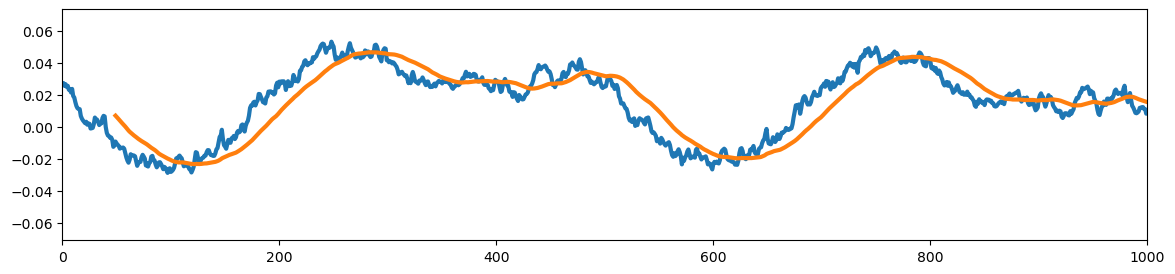

In [36]:
plt.figure(figsize=(14,3))
smooth_sig = smooth_df['1'].rolling(50).mean()
plt.plot((smooth_df['1']), linewidth =3)
plt.plot((smooth_sig), linewidth =3)
plt.xlim((0,1000));
print(len(smooth_sig))
print(smooth_sig[40:50])


## Save signals

saveing signals on a dataframe and 
saving it on a csv file

In [9]:
# Source
names = []
data = np.zeros(shape=(len(x_s_smooth),len(x_s_smooth[1])))
for i in range(len(x_s_smooth)):

    data[i,:] = x_s_smooth[i]
    name = f'S_{i:03}_{y_s[i]}'
    names.append(name)
names = np.array(names).reshape(-1,1)
data = np.hstack([names,data])
final_s = pd.DataFrame(data, columns=['name' if i==0 else str(i) for i in range(501)])
# Target
names = []
data = np.zeros(shape=(len(x_t_smooth),len(x_t_smooth[1])))
for i in range(len(x_t_smooth)):

    data[i,:] = x_t_smooth[i]
    name = f'T_{i:03}_{y_t[i]}'
    names.append(name)
names = np.array(names).reshape(-1,1)
data = np.hstack([names,data])
final_t = pd.DataFrame(data, columns=['name' if i==0 else str(i) for i in range(501)])


In [12]:
folder = r'G:\Masters\Term 2\Machine Learning\Project\SplitData'
final_s.to_csv(os.path.join(folder,'Source.csv'))
final_t.to_csv(os.path.join(folder,'Target.csv'))

In [11]:
print(len(y_t))

200
